In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
from colorama import Fore, Back, Style


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv("laptop_data_cleaned.csv")

In [18]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [21]:

df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [30]:
y = df.drop(columns=["Company", "TypeName" , "Cpu_brand", "Gpu_brand", "Os"], axis=1)
y.corr()


,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
Ram,1.000000,0.389134,0.680519,0.113316,0.202809,0.294927,0.097340,0.599552
Weight,0.389134,1.000000,0.151386,-0.292288,0.023966,-0.319499,0.510876,-0.056985
Price,0.680519,0.151386,1.000000,0.194289,0.279240,0.480687,-0.097361,0.658808
TouchScreen,0.113316,-0.292288,0.194289,1.000000,0.136973,0.452107,-0.205105,0.252142
Ips,0.202809,0.023966,0.279240,0.136973,1.000000,0.288833,-0.090411,0.215197
Ppi,0.294927,-0.319499,0.480687,0.452107,0.288833,1.000000,-0.290774,0.499899
HDD,0.097340,0.510876,-0.097361,-0.205105,-0.090411,-0.290774,1.000000,-0.400625
SSD,0.599552,-0.056985,0.658808,0.252142,0.215197,0.499899,-0.400625,1.000000


<Axes: >

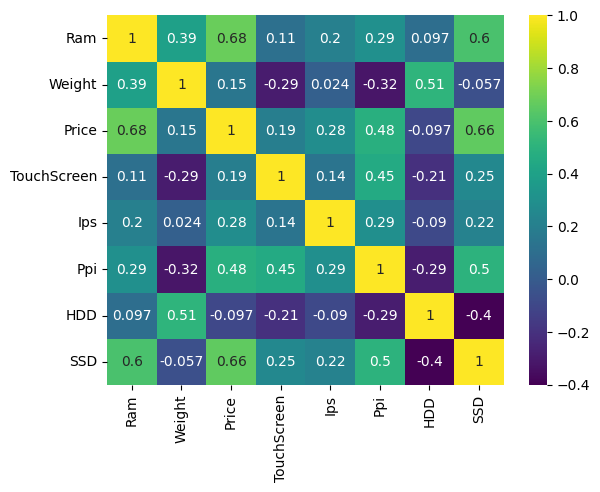

In [31]:
sns.heatmap(y.corr(), cmap="viridis", annot=True)

Text(0, 0.5, 'Frequency')

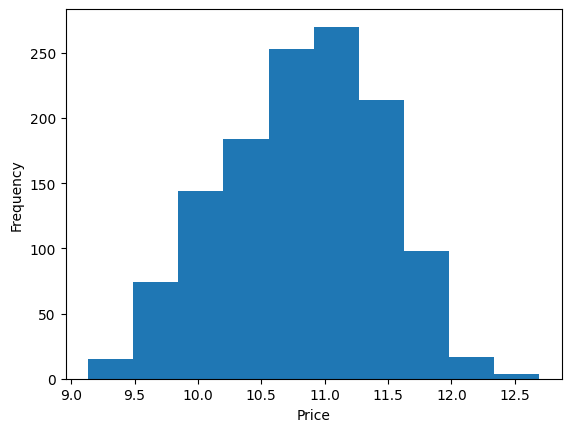

In [32]:
plt.hist(df['Price'])
plt.xlabel('Price')
plt.ylabel('Frequency')

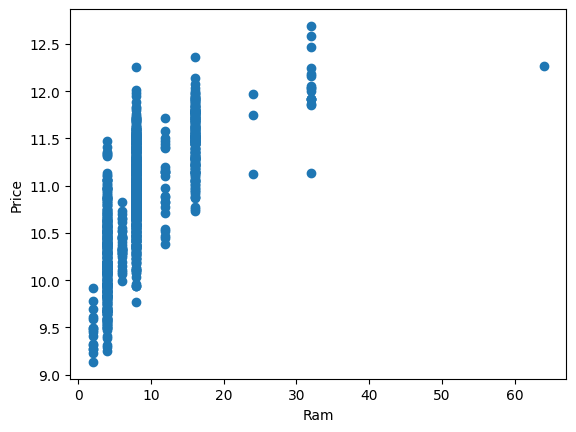

In [36]:
plt.scatter(df['Ram'],df['Price'])
plt.xlabel('Ram')
plt.ylabel('Price')
plt.show()

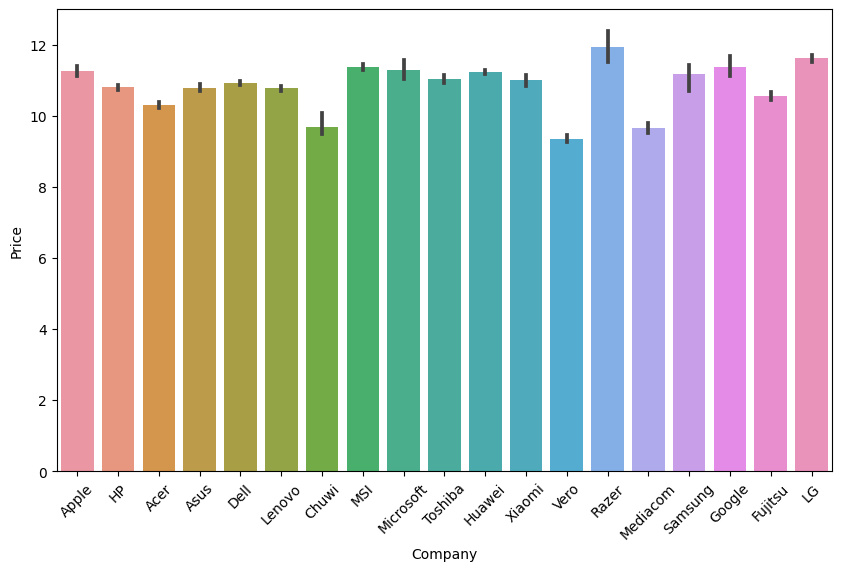

In [37]:
plt.figure(figsize=(10, 6))  # Increase the figure size
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation=45)  # Rotate the y-axis labels

plt.xlabel('Company')
plt.ylabel('Price')
plt.show()

In [38]:
# Extract relevant features
df['ScreenSize'] = df['Ppi'] * df['Weight']
df['StorageCapacity'] = df['HDD'] + df['SSD']

In [39]:
# Encode categorical features
# Transforma em novas atributos na tabela, com valores booleanos
df_encoded = pd.get_dummies(df, columns=['Company','TypeName', 'TouchScreen', 'Cpu_brand', 'Gpu_brand', 'Os'])

In [40]:
df_encoded.head()

,Ram,Weight,Price,Ips,Ppi,HDD,SSD,ScreenSize,StorageCapacity,Company_Acer,...,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Mac,Os_Others,Os_Windows
0,8,1.37,11.175755,1,226.983005,0,128,310.966716,128,False,...,False,True,False,False,False,True,False,True,False,False
1,8,1.34,10.776777,0,127.677940,0,0,171.088440,0,False,...,False,True,False,False,False,True,False,True,False,False
2,8,1.86,10.329931,0,141.211998,0,256,262.654316,256,False,...,False,True,False,False,False,True,False,False,True,False
3,16,1.83,11.814476,1,220.534624,0,512,403.578362,512,False,...,False,False,True,False,True,False,False,True,False,False
4,8,1.37,11.473101,1,226.983005,0,256,310.966716,256,False,...,False,True,False,False,False,True,False,True,False,False


In [41]:
# Começar o treinamento em relação a feature a ser analizada

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
le=LabelEncoder()
y_train = le.fit_transform(y_train)

In [45]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)

In [46]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, dt_pred)

In [47]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, rf_pred)

In [48]:
print("Linear Regression MSE:" + Fore.CYAN + str(mse_lr) + Style.RESET_ALL)
print("Decision Tree Regression MSE:" + Fore.RED + str(mse_dt) + Style.RESET_ALL)
print("Random Forest Regression MSE:" + Fore.GREEN + str(mse_rf) + Style.RESET_ALL)

Linear Regression MSE:116104.86819311505
Decision Tree Regression MSE:124658.67161098325
Random Forest Regression MSE:120919.47471446396


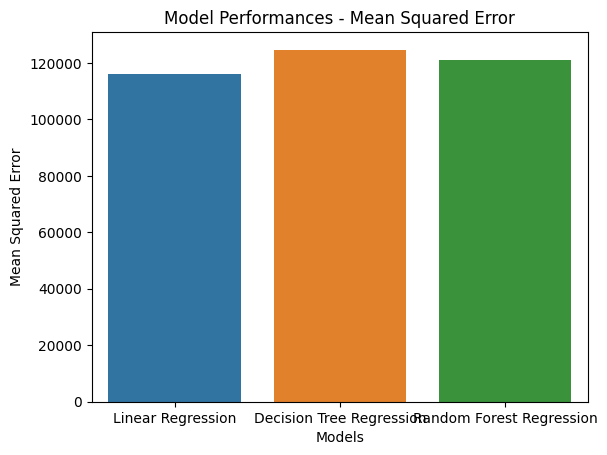

In [49]:
# Create a bar graph for model performances
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
mse_scores = [mse_lr, mse_dt, mse_rf]

sns.barplot(x=models, y=mse_scores)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Performances - Mean Squared Error')

plt.show()